In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [16]:
sample_submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')


In [17]:
train_x = train.iloc[:,1:]
train_y = train['label']

print(train_x.shape)
print(train_y.shape)
print(test.shape)

(42000, 784)
(42000,)
(28000, 784)


In [18]:
train_y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [19]:
# Normalizing the data
train_x = train_x/255.0
test = test/255.0

In [20]:
train.values.shape

(42000, 785)

In [21]:
# Reshaping In 3 Dimensions
train_x = train_x.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)


In [22]:
# Splitting into training and validation sets
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.2)


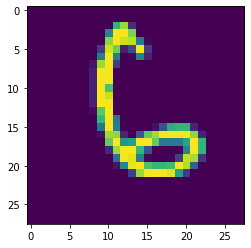

In [31]:
plt.imshow(train_X[1][:,:,0])

In [32]:
# Creating Model
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32,(3,3), input_shape = (28,28,1), activation = 'relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')
])

# Compile Model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [35]:
datagen = ImageDataGenerator()

datagen.fit(train_X)

history = model.fit_generator(datagen.flow(train_X, train_y, batch_size = 32), validation_data = (val_X, val_y), steps_per_epoch = len(train_X)//32,
                             epochs = 5, verbose = 1)

Train for 1050 steps, validate on 8400 samples
Epoch 1/5
1050/1050 [==============================] - 23s 22ms/step - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0.0673 - val_accuracy: 0.9862
Epoch 2/5
1050/1050 [==============================] - 23s 22ms/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.0758 - val_accuracy: 0.9851
Epoch 3/5
1050/1050 [==============================] - 22s 21ms/step - loss: 0.0064 - accuracy: 0.9979 - val_loss: 0.0937 - val_accuracy: 0.9845
Epoch 4/5
1050/1050 [==============================] - 23s 22ms/step - loss: 0.0066 - accuracy: 0.9979 - val_loss: 0.0747 - val_accuracy: 0.9874
Epoch 5/5
1050/1050 [==============================] - 33s 31ms/step - loss: 0.0011 - accuracy: 0.9995 - val_loss: 0.0750 - val_accuracy: 0.9892


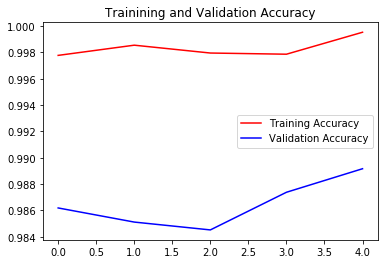

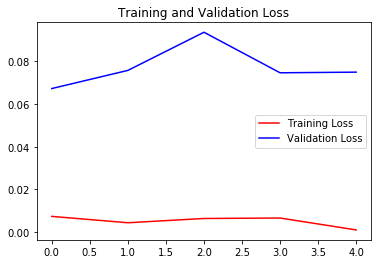

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc , 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Trainining and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [37]:
predictions = model.predict(test)

In [38]:
predictions

array([[1.3430868e-17, 2.5600719e-18, 1.0000000e+00, ..., 8.9393655e-14,
        2.9609135e-17, 4.3476828e-22],
       [1.0000000e+00, 1.9091408e-13, 1.5391573e-10, ..., 7.4205312e-13,
        4.4378780e-13, 2.8129580e-12],
       [5.6442032e-15, 7.9545595e-16, 2.2988009e-12, ..., 1.7479750e-12,
        1.3694700e-09, 1.0000000e+00],
       ...,
       [1.4375154e-28, 2.3316125e-18, 9.0930237e-24, ..., 2.8413928e-19,
        7.8801599e-19, 4.8573613e-20],
       [7.5364210e-13, 2.0099698e-15, 5.6037176e-15, ..., 7.9231749e-10,
        1.0222681e-11, 9.9999952e-01],
       [1.3914821e-20, 1.7126102e-20, 1.0000000e+00, ..., 1.6088762e-16,
        6.4952915e-17, 1.2662722e-21]], dtype=float32)

In [39]:
pred = np.argmax(predictions, axis = 1)

In [42]:
pred

array([2, 0, 9, ..., 3, 9, 2])

In [43]:
imageId = np.arange(len(pred)+1)[1:]
submission = pd.DataFrame()
submission['ImageId'] = imageId
submission['Label'] = pred

In [44]:
submission.to_csv('Submission4.csv',index=False)